In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp

In [2]:
df = pd.read_csv('./heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,presence
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [ ]:
# https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

# Data Info

In [3]:
# Check for missing values
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
presence    0
dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    float64
 1   sex       270 non-null    float64
 2   cp        270 non-null    float64
 3   trestbps  270 non-null    float64
 4   chol      270 non-null    float64
 5   fbs       270 non-null    float64
 6   restecg   270 non-null    float64
 7   thalach   270 non-null    float64
 8   exang     270 non-null    float64
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    float64
 11  ca        270 non-null    float64
 12  thal      270 non-null    float64
 13  presence  270 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 29.7 KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
cp,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
trestbps,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
chol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
fbs,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
restecg,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
thalach,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
exang,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
oldpeak,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


In [6]:
df.shape

(270, 14)

# Exploratory Data Analysis

🔣 Categorical Features: sex, cp, fbs, restecg, exang, slope, ca, thal, presence
🔢 Numerical Features: age, trestbps, chol, thalach, oldpeak


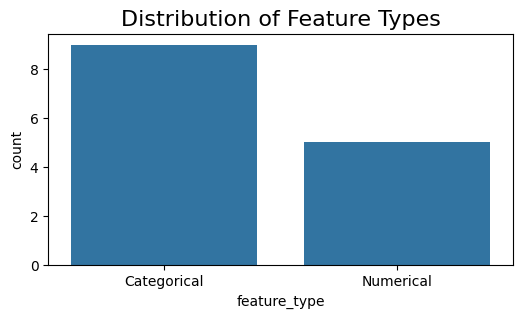

In [8]:
import pandas as pd
from termcolor import colored

# Assuming 'df' is your DataFrame
col = list(df.columns)
categorical_features, numerical_features = [], []

for feature in col:
    (
        numerical_features if len(df[feature].unique()) > 6 else categorical_features
    ).append(feature)

print(
    colored("🔣 Categorical Features:", "magenta", attrs=["bold"]),
    colored(", ".join(categorical_features), "cyan"),
)
print(
    colored("🔢 Numerical Features:", "green", attrs=["bold"]),
    colored(", ".join(numerical_features), "yellow"),
)

# Bonus: Visualize feature distribution
plt.figure(figsize=(6, 3))
sns.countplot(
    x="feature_type",
    data=pd.DataFrame(
        {
            "feature_type": ["Categorical"] * len(categorical_features)
            + ["Numerical"] * len(numerical_features)
        }
    ),
)
plt.title("Distribution of Feature Types", fontsize=16)
plt.savefig("./Feature_distributions.png")
plt.show()

In [10]:
# Label Encodings : Df_transformed is for correlation and other operations where numeric features are supported

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_transformed = df.copy(deep = True)

df_transformed['sex'] = le.fit_transform(df_transformed['sex'])
df_transformed['cp'] = le.fit_transform(df_transformed['cp'])
df_transformed['fbs'] = le.fit_transform(df_transformed['fbs'])
df_transformed['restecg'] = le.fit_transform(df_transformed['restecg'])
df_transformed['exang'] = le.fit_transform(df_transformed['exang'])
df_transformed['slope'] = le.fit_transform(df_transformed['slope'])
df_transformed['ca'] = le.fit_transform(df_transformed['ca'])
df_transformed['thal'] = le.fit_transform(df_transformed['thal'])
df_transformed['presence'] = le.fit_transform(df_transformed['presence'])
df_transformed

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,presence
0,70.0,1,3,130.0,322.0,0,2,109.0,0,2.4,1,3,0,1
1,67.0,0,2,115.0,564.0,0,2,160.0,0,1.6,1,0,2,0
2,57.0,1,1,124.0,261.0,0,0,141.0,0,0.3,0,0,2,1
3,64.0,1,3,128.0,263.0,0,0,105.0,1,0.2,1,1,2,0
4,74.0,0,1,120.0,269.0,0,2,121.0,1,0.2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,1,2,172.0,199.0,1,0,162.0,0,0.5,0,0,2,0
266,44.0,1,1,120.0,263.0,0,0,173.0,0,0.0,0,0,2,0
267,56.0,0,1,140.0,294.0,0,2,153.0,0,1.3,1,0,0,0
268,57.0,1,3,140.0,192.0,0,0,148.0,0,0.4,1,0,1,0


# Data Preperation

In [11]:
X = df_transformed.iloc[:,:-1].values
y=df_transformed.iloc[:,-1].values
# y = y.astype(bool)
# X = X.astype(int)
X

array([[70.,  1.,  3., ...,  1.,  3.,  0.],
       [67.,  0.,  2., ...,  1.,  0.,  2.],
       [57.,  1.,  1., ...,  0.,  0.,  2.],
       ...,
       [56.,  0.,  1., ...,  1.,  0.,  0.],
       [57.,  1.,  3., ...,  1.,  0.,  1.],
       [67.,  1.,  3., ...,  1.,  3.,  0.]])

In [12]:
from sklearn.preprocessing import StandardScaler,MaxAbsScaler,MaxAbsScaler,RobustScaler
sc_X = StandardScaler()
X  = sc_X.fit_transform(X)
X

array([[ 1.71209356,  0.6894997 ,  0.87092765, ...,  0.67641928,
         2.47268219, -0.85884094],
       [ 1.38213977, -1.45032695, -0.18355874, ...,  0.67641928,
        -0.71153494,  1.23023162],
       [ 0.2822938 ,  0.6894997 , -1.23804513, ..., -0.95423434,
        -0.71153494,  1.23023162],
       ...,
       [ 0.1723092 , -1.45032695, -1.23804513, ...,  0.67641928,
        -0.71153494, -0.85884094],
       [ 0.2822938 ,  0.6894997 ,  0.87092765, ...,  0.67641928,
        -0.71153494,  0.18569534],
       [ 1.38213977,  0.6894997 ,  0.87092765, ...,  0.67641928,
         2.47268219, -0.85884094]])

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler

# Assuming you have a DataFrame 'df'
df_numeric = df_transformed.select_dtypes(include=['float64', 'int64'])  # Select numeric columns
last_col = df_numeric.iloc[:, -1]  # Store the last column

# Remove the last column from the numeric DataFrame
df_numeric = df_numeric.iloc[:, :-1]

# Create scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
maxabs_scaler = MaxAbsScaler()
robust_scaler = RobustScaler()

# Perform scaling on numeric columns (excluding the last column)
df_standard = pd.DataFrame(standard_scaler.fit_transform(df_numeric), columns=df_numeric.columns)
df_minmax = pd.DataFrame(minmax_scaler.fit_transform(df_numeric), columns=df_numeric.columns)
df_maxabs = pd.DataFrame(maxabs_scaler.fit_transform(df_numeric), columns=df_numeric.columns)
df_robust = pd.DataFrame(robust_scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Append the original last column to the scaled DataFrames
df_standard = pd.concat([df_standard, last_col], axis=1)
df_minmax = pd.concat([df_minmax, last_col], axis=1)
df_maxabs = pd.concat([df_maxabs, last_col], axis=1)
df_robust = pd.concat([df_robust, last_col], axis=1)

# Combine scaled numeric columns with non-numeric columns (if any)
if df.shape[1] != df_numeric.shape[1] + 1:
    non_numeric_cols = [col for col in df.columns if col not in df_numeric.columns and col != last_col.name]
    df_standard = pd.concat([df_standard, df[non_numeric_cols]], axis=1)
    df_minmax = pd.concat([df_minmax, df[non_numeric_cols]], axis=1)
    df_maxabs = pd.concat([df_maxabs, df[non_numeric_cols]], axis=1)
    df_robust = pd.concat([df_robust, df[non_numeric_cols]], axis=1)

In [15]:
print("Standard Scaled Data")
df_standard.to_csv("./Standard_Scaled_Heart.csv", index=False)
print("MinMax Scaled Data")
df_minmax.to_csv("./MinMax_Scaled_Heart.csv", index=False)
print("MaxAbs Scaled Data")
df_maxabs.to_csv("./MaxAbs_Scaled_Heart.csv", index=False)
print("Robust Scaled Data")
df_robust.to_csv("./Robust_Scaled_Heart.csv", index=False)
print("Numeric Transformed Data")
df_transformed.to_csv("./Numeric_Transformed_Heart.csv", index=False)

Standard Scaled Data
MinMax Scaled Data
MaxAbs Scaled Data
Robust Scaled Data
Neumeric Transformed Data
